# 13wk-52: 취업(오버피팅) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xW-5oD3Rqu9EaJbfjhn-QL&si=0G5fT9n9RPcuxzPE>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.model_selection
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
np.random.randn(43052)
n_balance = 10 
toeic = np.random.randint(0,199,size=5000)*5
gpa = np.random.randint(100,450,size=5000)/100
u = toeic * 8/995 + gpa * 10/4.5
u = u - np.mean(u)
v = np.exp(u)/(1+np.exp(u))
employment = np.random.binomial(n=1,p=v)
df = pd.DataFrame({
'toiec':toeic,
'gpa':gpa,
'employment':employment
})
df_balance = pd.DataFrame((np.random.randn(5000,n_balance)).reshape(5000,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)]) > 0
df = pd.concat([df,df_balance],axis=1).assign(employment = lambda df: df.employment.map({0:'No',1:'Yes'}))
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [3]:
df_train

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,865,3.77,Yes,True,False,False,True,True,False,True,False,True,False
2162,605,2.70,Yes,True,True,False,False,False,False,False,False,False,False
2396,975,4.45,Yes,False,True,False,False,False,True,False,False,True,False
4768,820,2.65,Yes,True,True,False,True,False,True,True,True,False,False
2271,25,1.59,No,False,False,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,30,2.97,No,False,True,True,True,True,True,True,True,False,False
466,695,2.62,Yes,False,True,True,True,True,False,False,True,False,False
3092,55,3.97,No,True,False,True,True,True,False,False,False,False,False
3772,950,3.17,Yes,True,True,False,False,False,True,True,False,False,True


# 4. 적합

In [4]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='employment')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231203_075531/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231203_075531/"
AutoGluon Version:  0.8.2
Python Version:     3.8.18
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   673.30 GB / 982.82 GB (68.5%)
Train Data Rows:    1500
Train Data Columns: 12
Label Column: employment
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['Yes', 'No']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected whic

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

## Target variable analysis

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
employment,1500,2,No,755,object,,,object,


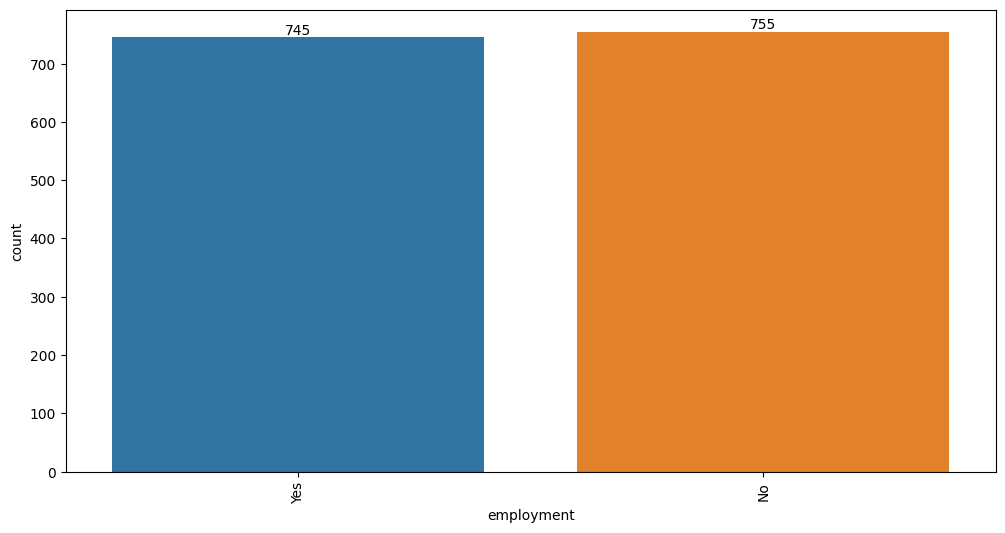

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment` >= `0.5`**

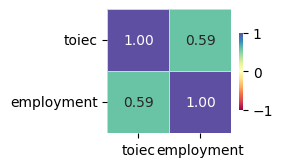

**Feature interaction between `toiec`/`employment` in `train_data`**

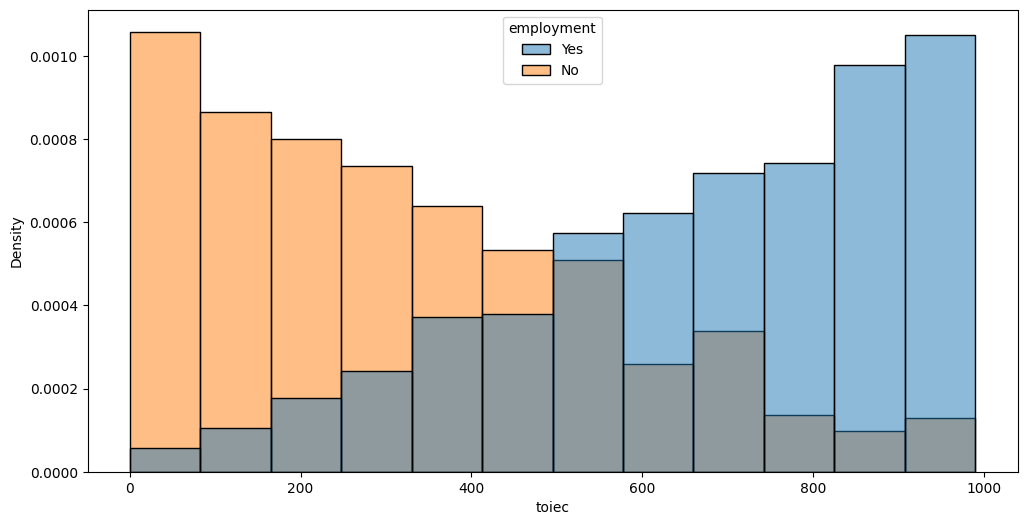

In [5]:
auto.target_analysis(
    train_data=df_train,
    label='employment',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231203_075536/"


### Model Prediction for employment

Using validation data for `Test` points

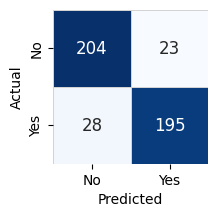

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.886667,0.838095,0.000841,0.00106,0.152619,0.000841,0.00106,0.152619,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
toiec,0.285778,0.021175,0.000004,5,0.329378,0.242177
gpa,0.164444,0.018592,0.000019,5,0.202727,0.126162
balance5,0.012889,0.002434,0.000146,5,0.017901,0.007877
balance1,0.005333,0.012727,0.200894,5,0.031538,-0.020872
balance9,0.005333,0.002981,0.008065,5,0.011472,-0.000805
balance6,0.003556,0.004608,0.079776,5,0.013044,-0.005933
balance0,0.001778,0.003296,0.147128,5,0.008564,-0.005009
balance2,0.001778,0.003975,0.186950,5,0.009963,-0.006407
balance8,0.000889,0.004608,0.344229,5,0.010377,-0.008599
balance3,0.000889,0.002534,0.238310,5,0.006106,-0.004328


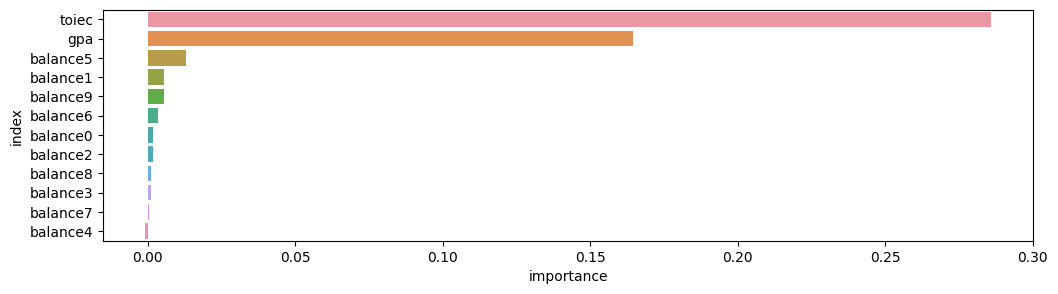

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
4344,505,3.79,True,False,False,False,True,False,True,True,True,True,No,0.160372,0.839628,0.679257
1365,415,2.08,True,False,False,True,False,False,True,False,True,True,Yes,0.822812,0.177188,0.645625
2371,515,3.85,False,True,True,False,False,False,True,True,True,False,No,0.185117,0.814883,0.629766
2523,425,4.05,True,False,True,False,False,True,True,True,True,False,No,0.193315,0.806685,0.613371
4617,565,3.63,False,True,True,False,True,True,False,True,False,False,No,0.238860,0.761140,0.522280
3486,90,3.57,True,False,True,True,False,True,True,True,False,True,Yes,0.738586,0.261414,0.477172
1982,720,3.10,True,True,True,False,True,False,True,False,False,False,No,0.267186,0.732814,0.465628
2987,960,2.05,False,False,False,True,False,True,True,False,True,False,No,0.282117,0.717883,0.435766
1396,205,3.11,True,False,True,True,False,True,True,False,True,True,Yes,0.701129,0.298871,0.402259
4828,295,3.46,False,False,True,False,True,False,False,True,False,True,Yes,0.683596,0.316404,0.367191


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
2983,470,2.67,True,False,False,True,False,True,False,True,True,True,No,0.496940,0.503060,0.006120
1603,360,3.42,False,True,True,False,True,True,False,True,False,False,Yes,0.505437,0.494563,0.010875
3951,110,3.87,True,False,True,True,True,True,False,False,False,False,No,0.490789,0.509211,0.018421
2695,165,4.15,True,True,True,True,True,True,True,True,True,False,Yes,0.510669,0.489331,0.021338
1297,785,1.70,False,False,True,False,False,True,True,True,False,True,Yes,0.511867,0.488133,0.023734
2595,560,2.75,False,False,True,False,True,True,False,True,False,True,Yes,0.516889,0.483111,0.033778
4027,865,1.10,False,True,False,False,True,False,True,False,False,False,Yes,0.518515,0.481485,0.037030
1388,935,1.10,False,False,False,True,True,True,False,False,False,False,Yes,0.520431,0.479569,0.040863
3056,495,2.75,True,True,False,False,True,True,False,False,False,True,Yes,0.520479,0.479521,0.040959
2122,820,1.88,False,False,False,True,False,False,True,False,False,False,No,0.478370,0.521630,0.043259


In [6]:
auto.quick_fit(
    train_data= df_train,
    label = 'employment',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

`-` 0번관측치

In [7]:
df_train.iloc[[0]]

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,865,3.77,Yes,True,False,False,True,True,False,True,False,True,False


In [8]:
predictr.predict(df_train.iloc[[0]])

4431    Yes
Name: employment, dtype: object

In [9]:
predictr.predict_proba(df_train.iloc[[0]])

,No,Yes
4431,0.03926,0.96074


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,865,3.77,Yes,1,0,0,1,1,0,1,0,1,0


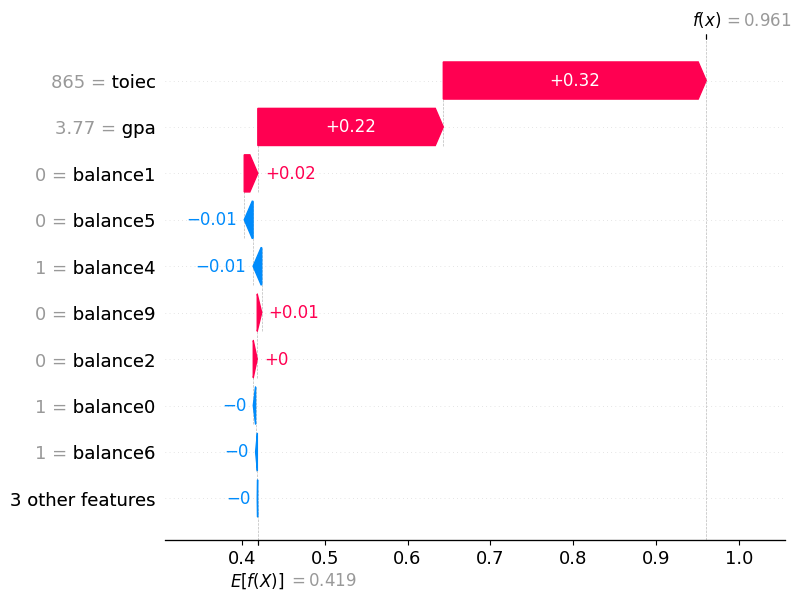

In [10]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[0]]*1,
    display_rows=True,
    plot='waterfall'
)

In [11]:
# 떨어진 이유

`-` 1번관측치

In [12]:
df_train.iloc[[1]]

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
2162,605,2.7,Yes,True,True,False,False,False,False,False,False,False,False


In [13]:
predictr.predict(df_train.iloc[[1]])

2162    Yes
Name: employment, dtype: object

In [14]:
predictr.predict_proba(df_train.iloc[[1]])

,No,Yes
2162,0.297759,0.702241


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
2162,605,2.7,Yes,1,1,0,0,0,0,0,0,0,0


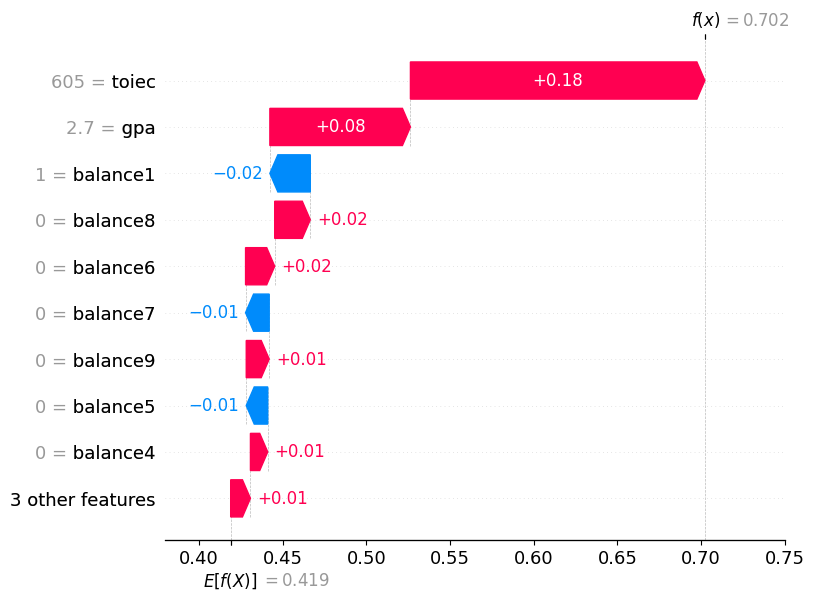

In [15]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]]*1,
    display_rows=True,
    plot='waterfall'
)

In [54]:
# 합격한이유